In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
RAW_DATA_DIR = "../data/raw/"
PROCESSED_DATA_DIR = "../data/processed/"

train_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "test.csv"))

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [5]:
print(f"Missing values in train: \n{train_df.isnull().sum()}\n")
print(f"Missing values in test: \n{test_df.isnull().sum()}")

Missing values in train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in test: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
'''Since from kaggle description we have this:
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

then FamilySize = SibSp + Parch + 1 (1 for self)'''

# create two new features: FamilySize and IsAlone
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1  
train_df.loc[train_df['FamilySize'] > 1, 'IsAlone'] = 0
# im not sure IsAlone is useful or not (basically if network is strong it should learn it from FamilySize
# so i will check this later with stronger network)

test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = 1
test_df.loc[test_df['FamilySize'] > 1, 'IsAlone'] = 0

In [7]:
# get all titles from name
temp = train_df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
print(temp.groupby(temp).count())
#GOOGLE ==> The title "Mme." is the French abbreviation for Madame,
# a formal term of respect for a woman, equivalent to "Mrs." or "Madam" in English 👍
# GOOGLE ==> No, "Master" is not the same as "Mr."; "Master" was traditionally a title for a young boy,
# while "Mr." is an honorific for adult men.🤷‍♂️

Name
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Name, dtype: int64


In [8]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
rares = train_df['Title'].groupby(train_df['Title']).count()[train_df['Title'].groupby(train_df['Title']).count() < 10].index
print(f'The rare titles are: {rares.to_list()}\n')
train_df['Title'] = train_df['Title'].replace(rares,'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms','Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')
print(train_df.head(20).to_markdown())
# -- do the same for test_df --
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
test_df['Title'] = test_df['Title'].replace(rares,'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle','Miss')
test_df['Title'] = test_df['Title'].replace('Ms','Miss')
test_df['Title'] = test_df['Title'].replace('Mme','Mrs')

The rare titles are: ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']

|    |   PassengerId |   Survived |   Pclass | Name                                                    | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |   FamilySize |   IsAlone | Title   |
|---:|--------------:|-----------:|---------:|:--------------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|-------------:|----------:|:--------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                 | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |            2 |         0 | Mr      |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer)     | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     |

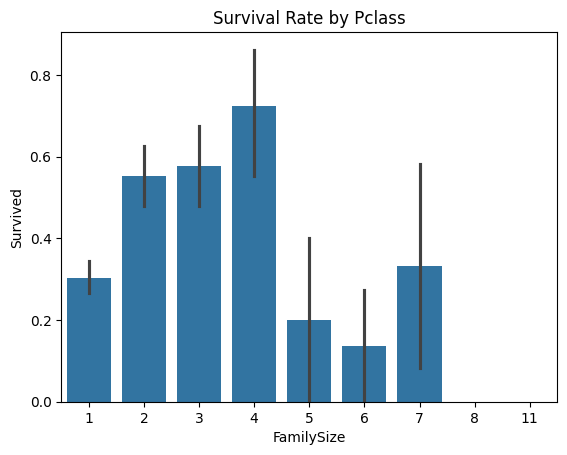

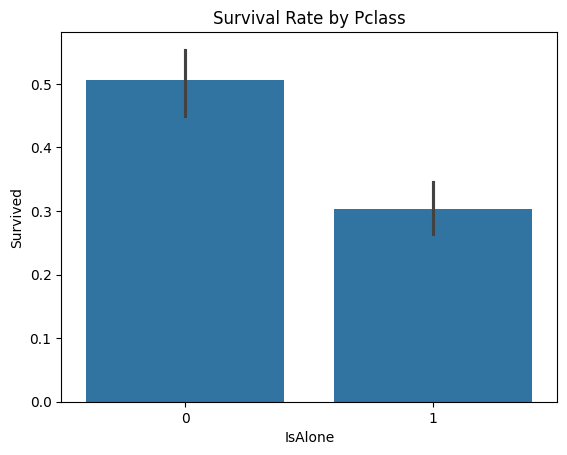

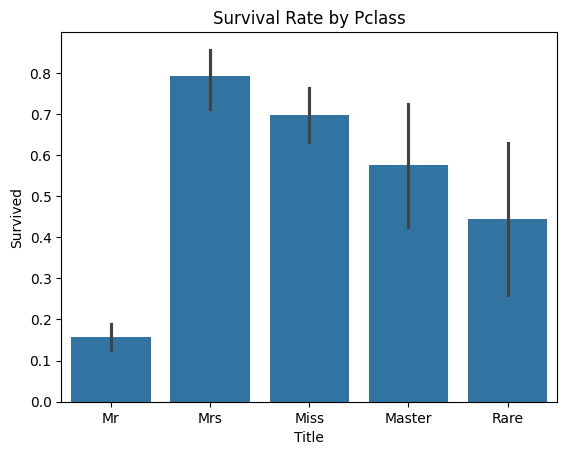

In [9]:
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

sns.barplot(x='IsAlone', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

sns.barplot(x='Title', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

In [10]:
# columns that have nan or missing values and number of missing values
# print(f"Missing values in train: \n{train_df.isnull().sum()}\n")
# print(f"Missing values in test: \n{test_df.isnull().sum()}")

In [11]:
temp=train_df.groupby('Title')['Age'].median()
print(f"Median age for each title:\n{temp.to_markdown()}")
# To me 3.5 is a weird value for Master age 🤷‍♂️
'''Google => Yes, the title "Master" was historically and
sometimes still is used for young boys in English-speaking
contexts, particularly up to the late 19th century and into
the 20th century 👍''' 

Median age for each title:
| Title   |   Age |
|:--------|------:|
| Master  |   3.5 |
| Miss    |  21   |
| Mr      |  30   |
| Mrs     |  35   |
| Rare    |  44.5 |


'Google => Yes, the title "Master" was historically and\nsometimes still is used for young boys in English-speaking\ncontexts, particularly up to the late 19th century and into\nthe 20th century 👍'

In [12]:
# fill the nan values with median of each title
for title, age in temp.items():
    train_df.loc[(train_df['Age'].isnull()) & (train_df['Title'] == title), 'Age'] = age
    test_df.loc[(test_df['Age'].isnull()) & (test_df['Title'] == title), 'Age'] = age

In [13]:
train_df['Cabin_deck'] = train_df['Cabin'].astype(str).str[0]
train_df['Cabin_deck'] = train_df['Cabin_deck'].replace('n', np.nan)  # for NaN turned 'nan'
deck_map = {1: 'B', 2: 'D', 3: 'F'}
train_df['Cabin_deck'] = train_df['Cabin_deck'].fillna(train_df['Pclass'].map(deck_map))
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
# --  do the same for test_df --
test_df['Cabin_deck'] = test_df['Cabin'].astype(str).str[0]
test_df['Cabin_deck'] = test_df['Cabin_deck'].replace('n', np.nan)  # for NaN turned 'nan'
test_df['Cabin_deck'] = test_df['Cabin_deck'].fillna(test_df['Pclass'].map(deck_map))
test_df['HasCabin'] = test_df['Cabin'].notnull().astype(int)

In [14]:
most_common_embarked = train_df["Embarked"].mode()[0]
train_df["Embarked"] = train_df["Embarked"].fillna(most_common_embarked)

In [15]:
print(f"Missing values in train: \n{train_df.isnull().sum()}\n")
print(f"Missing values in test: \n{test_df.isnull().sum()}")
# REMEMBER i want use Cabin_deck and not Cabin itself because

Missing values in train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
IsAlone          0
Title            0
Cabin_deck       0
HasCabin         0
dtype: int64

Missing values in test: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
IsAlone          0
Title            0
Cabin_deck       0
HasCabin         0
dtype: int64


In [16]:
test_df["Fare"] = test_df["Fare"].fillna(
    test_df.groupby("Pclass")["Fare"].transform("median")
)

In [17]:
categorical_features = ['Sex', 'Embarked', 'Title', 'Cabin_deck']
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)


In [18]:
# this part remove because the issue of Data Leakage
'''
If you calculated the mean and standard deviation for scaling
using the ENTIRE dataset (Train + Val), you leaked information
from the validation set into the training process. This makes the
validation data seem "easier" than it should be, resulting in an
artificially high initial validation accuracy that quickly flatlines as the
model overfits the leaked info.'''

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# num_features = ['Age', 'Fare', 'FamilySize']

# train_df[num_features] = scaler.fit_transform(train_df[num_features])
# test_df[num_features] = scaler.transform(test_df[num_features])


'\nIf you calculated the mean and standard deviation for scaling\nusing the ENTIRE dataset (Train + Val), you leaked information\nfrom the validation set into the training process. This makes the\nvalidation data seem "easier" than it should be, resulting in an\nartificially high initial validation accuracy that quickly flatlines as the\nmodel overfits the leaked info.'

In [19]:
cols_to_drop = [ "Name", "Ticket", "Cabin"]
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

In [20]:
# save the processed data
train_df.to_csv(os.path.join(PROCESSED_DATA_DIR, "train_processed.csv"), index=False)
test_df.to_csv(os.path.join(PROCESSED_DATA_DIR, "test_processed.csv"), index=False)